![title](img/airbnb.png)

# Introduction

This notebook is created as part of a capstone project for Springboard's Data Analytics Career Track program. The findings of this notebook will be paired with a Tableau dashboard to show different perspectives of the data.

The data conducted in this notebook was found from https://www.kaggle.com/jojoker/singapore-airbnb 
and is based on a scrape of Airbnb SG listings published in August 2019. 
The background set for fictious scenario in this project is that a potential Airbnb host would like to figure out what the most lucrative region is to list a rental property. In addition, which variables are important or have an impact in deciding to list a rental property. 



## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn import datasets, linear_model
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


## Loading the Data
#### Check data types of columns
First off, let's check the data-type and shape of the dataset and see if there's any changes needed to be made.



In [2]:
dataset = pd.read_csv('Singapore Airbnb Listings.csv')
dataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [3]:
dataset.shape

(7907, 16)

Initially the dataset contains roughly 8k rows and 16 columns with a mix of different datatypes (int64, float64, and objects).

## Data Assessment and Data Cleansing


Let's check for any nulls in the dataset and clean up our data.

In [4]:
dataset.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [5]:
dataset.fillna({'reviews_per_month':0}, inplace=True)
dataset.fillna({'last_review':"Not Reviewed"}, inplace=True)
dataset.fillna({'name':"No Name"}, inplace=True)

Checking for nulls show two null entries for names and 2758 null values for last_review and reviews_per_month.
An assumption that these listings did not get a review by its guest will be made as typically not every
individual will always leave a review.  

Instead of having these values set at null, the values will be changed as followed:  
Reviews per month -> 0   
Last review -> Not Reviewed  
Name -> No Name   
 


In [6]:
#Let's confirm that the changes are made in the dataset
dataset.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Airbnb SG Data Exploration and Visualization in Python

### Exploring different variables
Let's start exploring each variables in the dataset and seeing which is relevant to consider 
when a potential host wants to sign up with Airbnb.


#### Correlation Matrix
First, let's create a correlation matrix with all the variables to see an overall view of the relationship between
variables.  
Afterwards, let's dive into each variables of interest and see its effect.



Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

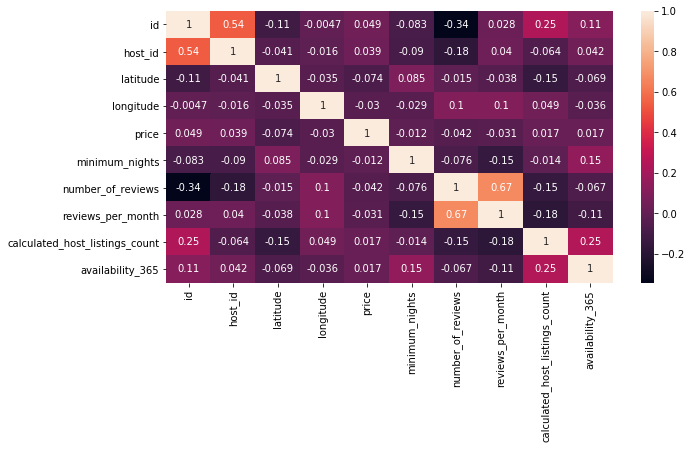

In [7]:
corr = dataset.corr(method = 'pearson')
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True)
dataset.columns

It would be expected that not all variables would be an important feature for a potential host to consider when wanting to list a property with Airbnb. Logically speaking, it does not make sense if id and host-id have much of an impact. These variables are just place-holders to identify the listing name and the name of the host. I would assume that variables such as price, minimum nights, reviews, host listings count and availability would play a much bigger role for a potential host to decide where to list their properties.



#### Price

In [8]:
#Let's first look at price
dataset["price"].describe()

count     7907.000000
mean       169.332996
std        340.187599
min          0.000000
25%         65.000000
50%        124.000000
75%        199.000000
max      10000.000000
Name: price, dtype: float64

We can see that the average price of an airbnb listing in Singapore in 2019 is 169, howver this does not
consider price by room type.  
Price range varies between 0 to 10000, this seems a bit odd!

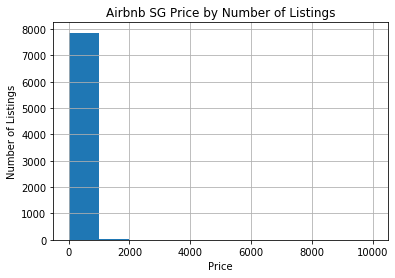

In [9]:
#How does the distribution of price look?

hist_price = dataset["price"].hist()
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.title('Airbnb SG Price by Number of Listings')
plt.show()


We can clearly see that although the price range is between 0-1000 majority of the listings have a price
under 1000.  


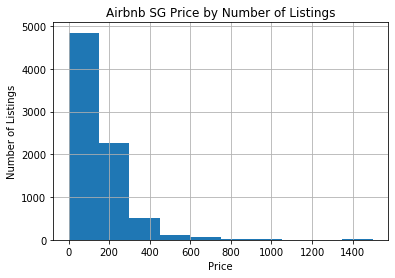

In [10]:
#Let's set a price cap to visualize a better price distribution and to determine the outliers

hist_price0 = dataset["price"][dataset["price"]<1800].hist()
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.title('Airbnb SG Price by Number of Listings')
plt.show()



This histogram shows a clearer picture of the overall listing price offered in Airbnb SG.    
There's a normal distribution with most of the listings being in the price range of 0-300.  
Let's now determine the percentages of listings under 1K and the listings over 1K.


In [11]:
#How many listings have price under $1000?
dataset[dataset["price"]<1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,38105126,Loft 2 pax near Haw Par / Pasir Panjang. Free ...,278109833,Belle,Central Region,Queenstown,1.27973,103.78751,Entire home/apt,100,3,0,Not Reviewed,0.00,31,61
7903,38108273,3bedroom luxury at Orchard,238891646,Neha,Central Region,Tanglin,1.29269,103.82623,Entire home/apt,550,6,0,Not Reviewed,0.00,34,365
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Mindy,Central Region,Kallang,1.31286,103.85996,Private room,58,30,0,Not Reviewed,0.00,3,173
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Huang,Central Region,River Valley,1.29543,103.83801,Private room,56,14,0,Not Reviewed,0.00,2,30


In [12]:
#Let's check the opposite. How many listings have price over $1000?
dataset[dataset["price"]>1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38,804470,Spacious Luxury Condo in Orchard,741873,Dara,Central Region,Tanglin,1.30292,103.82253,Entire home/apt,2604,1,1,2014-02-22,0.01,1,0
160,2566687,Room in the NW part of SG,4332365,Kenneth,West Region,Choa Chu Kang,1.39245,103.75270,Private room,1200,13,0,Not Reviewed,0.00,1,365
466,5807596,Small Cozy Masterbed room,30132726,Ho,Central Region,Bukit Merah,1.27513,103.81075,Private room,2000,1,0,Not Reviewed,0.00,1,0
601,6790378,Near Orchard Single Room-Female Only,29444441,JYidea,Central Region,Novena,1.31564,103.84075,Private room,1800,1,0,Not Reviewed,0.00,1,83
610,6837947,Flat for Rent,35833085,Benedict,North-East Region,Hougang,1.37877,103.88950,Entire home/apt,2300,365,0,Not Reviewed,0.00,1,365
922,8742389,Full furniture and nice enviroment,45863208,Sean,Central Region,Bishan,1.36486,103.83297,Shared room,1100,1,0,Not Reviewed,0.00,1,90
949,8957125,Red Hill HDB 出租 近地铁站 楼下有两个食阁 交通方便,46814375,Victor,Central Region,Bukit Merah,1.28733,103.81630,Private room,1019,1,0,Not Reviewed,0.00,1,365
1119,9958663,Master Bedroom for RENT,35263906,Jerome,Central Region,Bishan,1.36412,103.83146,Private room,1350,1,0,Not Reviewed,0.00,1,0
1183,10343562,City 1 + 1 Bedroom Studio Apartment,53235451,Ian,Central Region,Rochor,1.29943,103.85177,Entire home/apt,3500,365,0,Not Reviewed,0.00,1,0
1319,11544732,P,60916030,Yin,Central Region,Outram,1.28348,103.84135,Private room,7000,2,5,2017-12-12,0.18,1,365


7859 listings have a price per day of under 1000 (99%) with the remaining 1% (48 listings) having a price of over a thousand. These exorbitant pricing are either a result of lavish housing accomodations or potential errors during a data input. These listings are a combination of private rooms and entire homes/apartments. Since these listings are skewing our results, they will be treated as outliers and removed for future analysis.

In [13]:
#Setting 300 as the threshold price, let's exclude the outliers

dataset = dataset[dataset["price"]<300]
dataset["price"].describe()

count    7115.000000
mean      122.075053
std        70.351533
min         0.000000
25%        60.000000
50%       110.000000
75%       168.000000
max       299.000000
Name: price, dtype: float64

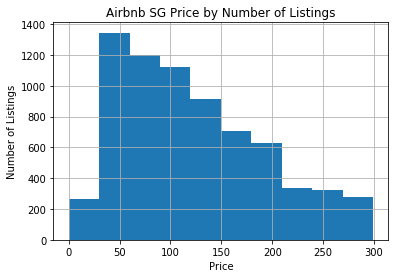

In [14]:
#The range from 0-300 shows a typical gaussian distribution

dataset = dataset[dataset["price"]<1000]
hist_price1 = dataset["price"][dataset["price"]<300].hist()
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.title('Airbnb SG Price by Number of Listings')
plt.show()


As expected by setting a lower constraint to 0-300, the average price per day has decreased from 169 to 122.  
With this threshold, most listings are within the price range of 60-168.


#### Neighbourhood Groups/Regions

Now that price has been looked into, how does neighbourhood groups come into play?    
      Let's consider these questions:   
Which regions have the most listings?   
Which regions have the lowest average price?   
How about the highest average price?    
How does the distribution by neighbourhood group and room type look?   



In [15]:
#Which neigbhourhood_groups are most listings located in?

dataset['neighbourhood_group'].value_counts()

Central Region       5609
West Region           497
East Region           485
North-East Region     332
North Region          192
Name: neighbourhood_group, dtype: int64

78% of listings are located in the Central Region of Singapore.   
7% of listings are located in the West Region of Singapore.   
7% of listings are located in the East Region of Singapore.    
5% of listings are located in the North-East Region of Singapore.    
3% of listings are located in the North Region of Singapore.  

In [16]:
#What's the average listing price by neighbourhood group?

neighborhood_price = dataset.groupby("neighbourhood_group")["price"].describe()
neighborhood_price

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Central Region,5609.0,130.405776,70.850492,0.0,69.0,124.0,179.0,299.0
East Region,485.0,102.342268,56.733959,14.0,58.0,90.0,131.0,278.0
North Region,192.0,88.510417,62.903066,18.0,43.5,61.0,125.0,299.0
North-East Region,332.0,78.388554,50.463737,19.0,44.0,62.0,99.0,287.0
West Region,497.0,89.462777,62.627572,14.0,50.0,62.0,119.0,290.0


The average price by neighbourhood group ranges from 78-130 a night.  
We can see that Central Region is both the most popular region by listing and the most expensive region 
for rental with an average price of 130 a night.
This could potentially be a result of the location. The central region is the main metropolitan region of Singapore
and a premier destination spot for travelers. 

It's also interesting to note that the West Region is the second most popular region and the East Region is the third most populated region, but its average prices are flipped. This goes the same for the North-East Region and North Region. This shows that count of listings are not representative of its price and is contributed to other factors.





Text(0.5, 1, 'Neighbourhood Group & Price Distribution')

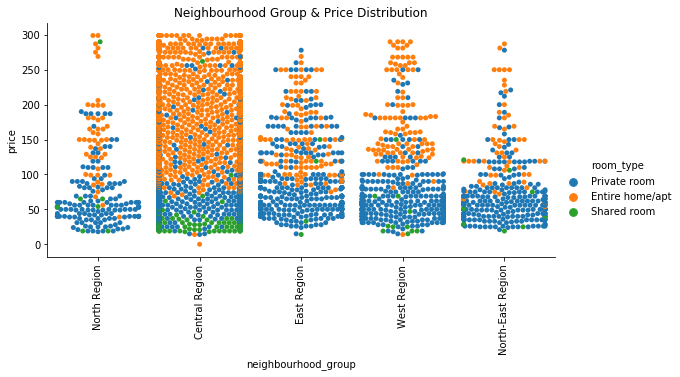

In [17]:
#How does the distribution between price and neighbourhood group look by room type?

chart = sns.catplot(
        data=dataset,
        x = "neighbourhood_group",
        y = "price",
        hue = "room_type",
        kind = "swarm",
        aspect = 2,
        height = 4)
plt.xticks(rotation = 90)
plt.title("Neighbourhood Group & Price Distribution")


Text(0.5, 1, 'Neighbourhood Group & Price Distribution')

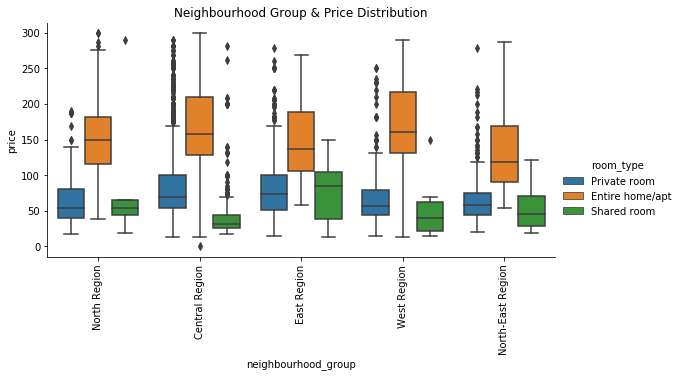

In [18]:
chart = sns.catplot(
        data=dataset,
        x = "neighbourhood_group",
        y = "price",
        hue = "room_type",
        kind = "box",
        aspect = 2,
        height = 4)
plt.xticks(rotation = 90)
plt.title("Neighbourhood Group & Price Distribution")


From the previous two distributions, we can clearly see that the central region contains most of the listings in Airbnb SG. We can also see the outliers between the different regions, with most outliers being in private rooms.

Most listings with price > 100 are entire homes/apartments with some exceptions of private rooms in the Central Region.    
The North Region, East Region, West Region and North-East Region typically have listings of price < 100 with room-types predominantely being private rooms, with some shared rooms and entire homes/apartments.

It could be expected that price of room type is dependent on both location as well as its benefits.
It ultimately comes down to the preference of the guest and how private they want their stay to be and it is this premium that guests will have to pay. Entire homes/apartments would be the most expensive, followed by private rooms and the cheapest being shared rooms.



#### Neighbourhoods

Previously we saw that that most listings in Airbnb SG were centered in the Central Region which also had the highest average price by region.  
Now let's consider the relevancy of neighborhood.

In [19]:
#Which neigbourhood are most listings located?

dataset['neighbourhood'].value_counts()

Kallang                    952
Geylang                    917
Novena                     498
Rochor                     473
Outram                     443
Bukit Merah                431
Bedok                      354
Downtown Core              350
River Valley               324
Queenstown                 247
Tanglin                    180
Marine Parade              158
Jurong West                148
Singapore River            141
Bukit Timah                117
Jurong East                112
Newton                     111
Hougang                    100
Toa Payoh                   97
Clementi                    76
Orchard                     72
Pasir Ris                   70
Serangoon                   68
Woodlands                   65
Sengkang                    65
Bukit Batok                 62
Choa Chu Kang               62
Tampines                    61
Ang Mo Kio                  57
Bishan                      51
Yishun                      49
Museum                      45
Punggol 

From the six regions, there are 41 unique neighborhoods in Singapore.  
The range of listings is between 1-952 with most listings in Kallang (952) and the least listings in Lim Chu Kang (1).

In [20]:
#Let's find the count of neighbourhoods that appear more than 200 times

dfnh =dataset.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() > 200)
len(dfnh["neighbourhood"])


4989

4989 of the listings are counted more than 200 times or 70% of the dataset.  
The remaining 30% of the listings have a range between 1-180, with the bottom five neighbourhoods appearing only in the single digits (Sungei Kadut 5, Western Water Catchment 4, Mandai 3, Southern Islands 2, Lim Chu Kang 1).
We can definitely see that there is significant disparity between the different neighbourhoods.


Text(0.5, 1, 'Neighbourhood Group & Price Distribution')

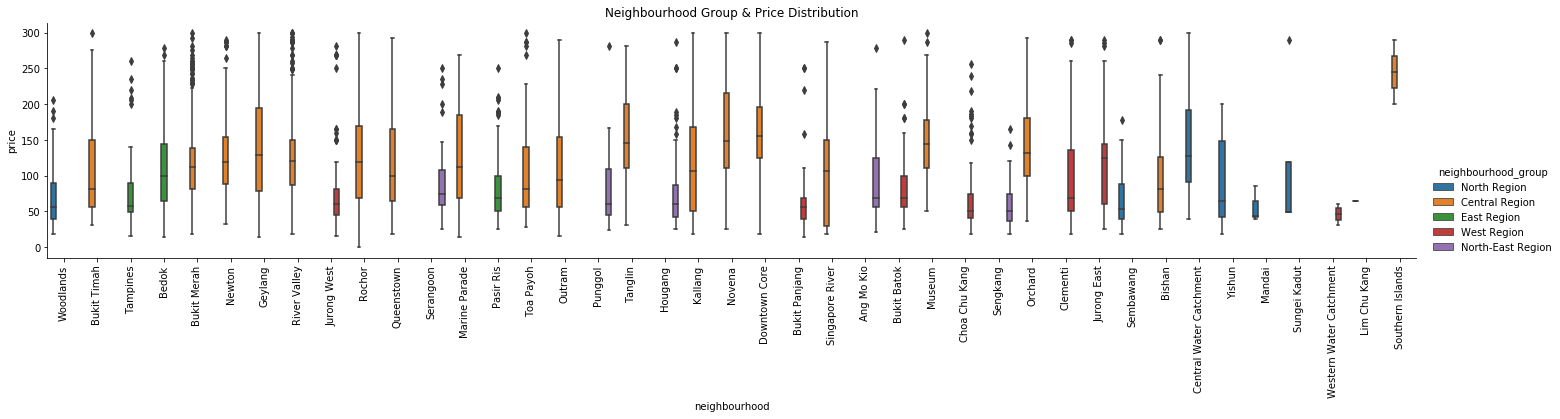

In [21]:
#Let's figure out which neighbourhoods are in which specific neighbourhood_group/region


chart = sns.catplot(
        data=dataset,
        x = "neighbourhood",
        y = "price",
        hue = "neighbourhood_group",
        kind = "box",
        aspect = 5,
        height = 4)
plt.xticks(rotation = 90)
plt.title("Neighbourhood Group & Price Distribution")


This boxplot shows the price distribution of each neighbourhood.  
We can see that there is definitely a price disparity and where the outliers lie
between the different neighbourhood groups.

In addition, we can see which neighbourhood is within which neighbourhood group/region.  
There are 19 neighbourhoods in the Central Region.   
There are 7 neighbourhoods in the North Region.    
There are 7 neighbourhoods in the West Region.  
There are 5 neighbourhoods in the Northeast Region.  
There are 3 neighbourhoods in the East Region. 



#### Host Ids

In [22]:
#Are there any duplicate host ids? 

df = dataset.groupby(["host_id"])
max(df.size())

254

In [23]:
df.size().value_counts().head()

1    1841
2     309
3     106
4      53
5      40
dtype: int64

We can see that there are 1841 unique host-ids that only appear once in the Airbnb SG website.    
However, some host_ids appear as much as 254 times after cleaning up the data.

In [24]:
#Which host_id has the most listings?

host_id_counts = dataset["host_id"].value_counts()
max_host = host_id_counts.idxmax()
max_host

66406177

In [25]:
dataset[dataset["host_id"] == 66406177]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2038,16174252,Humble & Conveniently Located 1BR in Katong Area,66406177,Jay,Central Region,Marine Parade,1.30570,103.89816,Entire home/apt,90,4,19,2018-06-02,0.67,274,0
2192,16701352,Leisure Studio APT 5 mins from Tg Pagar MRT,66406177,Jay,Central Region,Downtown Core,1.27350,103.84527,Entire home/apt,144,30,34,2019-07-24,1.30,274,359
2522,18484277,Humble & Conveniently Located 1BR in Katong Area,66406177,Jay,Central Region,Marine Parade,1.30587,103.89759,Entire home/apt,110,30,20,2019-06-03,0.71,274,303
2523,18486921,BRAND NEW 2bedroom home at West Coast/Clementi,66406177,Jay,West Region,Clementi,1.31596,103.75666,Entire home/apt,126,10,29,2019-06-02,1.07,274,0
2524,18487688,Superhost 1BR APT in the heart of Tg Pagar,66406177,Jay,Central Region,Downtown Core,1.27548,103.84444,Entire home/apt,146,30,22,2019-03-01,0.85,274,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,37788787,Comfy & Relaxing Studio APT near Farrer Park MRT,66406177,Jay,Central Region,Kallang,1.31200,103.85628,Entire home/apt,99,30,0,Not Reviewed,0.00,274,334
7746,37789401,Comfy & Relaxing 1-Bedroom APT near FarrerPark...,66406177,Jay,Central Region,Kallang,1.31229,103.85829,Entire home/apt,111,30,0,Not Reviewed,0.00,274,235
7747,37790507,City located 2-bedroom apartment * BRAND NEW*,66406177,Jay,Central Region,Kallang,1.30347,103.86325,Entire home/apt,161,30,0,Not Reviewed,0.00,274,300
7808,37924009,Superior 1BR Residence near Farrer Park MRT,66406177,Jay,Central Region,Kallang,1.31312,103.85894,Entire home/apt,136,30,0,Not Reviewed,0.00,274,303


Here we can see that Jay has the most listings, with 254 listings in Airbnb Singapore that are mainly located in the Central Region listed as entire homes/apartments.

It was previously mentioned that some variables are not as important as others.
ID and host name are probably not as relevant and efficient for a potential host to determine what the most efficient and optimal way is to get their highest ROI if they decide to sign up with Airbnb Singapore. At most, these variables could be utilized as more research on popular hosts.

Feature selection will now be applied and listing id and host names will be dropped.



In [26]:
dataset = dataset.drop(columns = ["id","host_name"])

#### Name Length

Does the length of a listing have any sort of impact?  
(i.e: Would a longer name of a listing have more visibility over a shorter name?  
Or would a longer name of a listing have more reviews or higher price than a shorter listing name?)


In [27]:
#Let's find the Min/Max name length and the ID for these listings

dataset["name_length"] = dataset['name'].map(str).apply(len)
print(dataset["name_length"].max())
print(dataset["name_length"].min())
print(dataset["name_length"].idxmax())
print(dataset["name_length"].idxmin())

92
1
6612
2629


In [28]:
#What's the listing name with the longest length?
dataset.at[6612, 'name']


'新加坡地区温馨好房,可以长住可以短租有兴趣加 (Hidden by Airbnb) vilyyyy或者拨打新加坡本地电话 (Phone number hidden by Airbnb)'

In [29]:
#What's the listing name with the shortest length?
dataset.at[2629, 'name']

'.'

Based from the results above, we can see that the shortest listing name has 1 character while the longest listing name has 6612 characters.

Does the length of a listing impact it's visibility to users?   
Let's assume that higher number of reviews is a result of people booking that particular listing 
based off the visibility and length of a listing,  
meaning that name length -> more bookings -> more reviews -> more visibility.

In [30]:
ng_nl = dataset.groupby("neighbourhood_group")["name_length"].describe()
ng_nl

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Central Region,5609.0,38.641647,10.258670,1.0,33.0,41.0,47.0,85.0
East Region,485.0,35.261856,11.656919,3.0,29.0,35.0,46.0,52.0
North Region,192.0,34.666667,13.152482,2.0,26.0,35.0,47.0,59.0
North-East Region,332.0,32.150602,12.368764,3.0,23.0,32.0,43.0,50.0
West Region,497.0,34.991952,12.662171,4.0,28.0,36.0,46.0,92.0


In [31]:
ng_rt = dataset.groupby("room_type")["name_length"].describe()
ng_rt

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,3470.0,39.051009,10.027721,1.0,33.0,42.0,47.0,85.0
Private room,3264.0,36.512868,11.627314,2.0,30.0,38.0,47.0,92.0
Shared room,381.0,36.427822,10.404360,1.0,31.0,36.0,46.0,53.0


We can see that the average name length of the different regions vary between 32-39, with the Central Region having the longest name length.   
In addition, we can also see that entire homes/apartment have the longest name length, followed by private rooms and shared rooms.



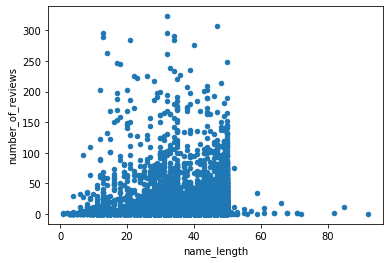

In [32]:
#Let's create a scatterplot showing name_length by number_of_reviews
dataset.plot.scatter(x = "name_length", y = "number_of_reviews")

In [33]:
#What's the correlation between name_length and number_of_reviews?
dataset["name_length"].corr(dataset["number_of_reviews"])

-0.028797450544760957

We can clearly see that there is no relationship between the name length of a listing and the number of reviews.   
In fact there is a slight negative correlation between these two variables.

Let's now see if there is a relationship between the length of a listing and price.  
The cutoff point for name_length will be set at 50 as most name lengths are <50.

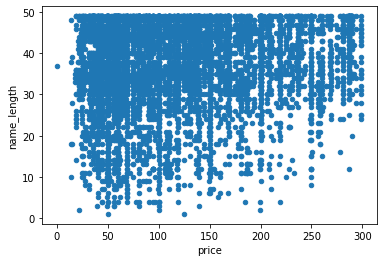

In [34]:
dataset[dataset["name_length"]<50].plot.scatter(x="price", y="name_length")

In [35]:
dataset["name_length"].corr(dataset["price"])

0.1246681590538997

Name length and price does have a relationship!   
There's a slight positive correlation (0.125) between these two variables.


Future hosts can take this into consideration when listing their properties.    
This could potentially be a result from current hosts wanting to advertise their property in their name and what it entails (location, amenities, walk-score, etc).   
A longer name might display better accomodations and benefits than a shorter name and comes at a higher price.
Perhaps this contributes to Central Regions' and entire homes/apartment success, as it is these variables that
are the most lucrative. 






#### Room Type

The relevance of room type is expected to be important.   
Besides deciding where a guest would want to plan their stay, a guest would also have to decide on the room type which is also related to price and minimum nights of stay. A more frugal guest would more likely choose a cheaper option for a long stay, whereas travelers who are on vacation might want to splurge and choose a more luxury place of stay.


In [36]:
#Let's look at room_type and see if if it has any relationship with other categories

dataset['room_type'].value_counts()

Entire home/apt    3470
Private room       3264
Shared room         381
Name: room_type, dtype: int64

In [37]:
#How does the statistics and distribution of room type look?

rt_price = dataset.groupby('room_type')["price"].describe()
rt_price

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,3470.0,169.930548,58.683506,0.0,125.0,156.0,208.0,299.0
Private room,3264.0,80.133578,45.552500,14.0,50.0,65.0,96.0,290.0
Shared room,381.0,45.535433,38.794084,14.0,26.0,32.0,50.0,290.0


Like we saw earlier, most listings are entire homes/apartments, followed by private rooms, and shared rooms being the least offered listing.   
The distribution between room type are 49%, 46% and 5% respectively for entire homes/apartments, private rooms and shared rooms.
Price differences also follows this pattern, with the average price of an entire home/apartment being 169.9, followed by private rooms and lastly shared rooms.

Text(0.5, 1, 'Room Type & Price Distribution')

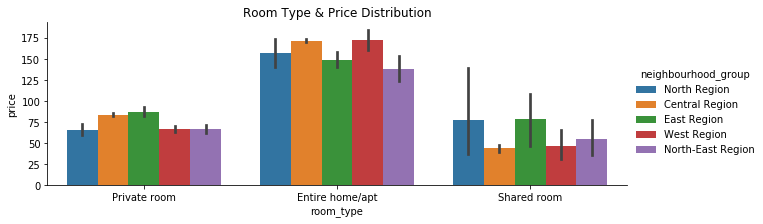

In [38]:
#Let's look at the distribution on room type and price 

chart = sns.catplot(
        data=dataset,
        x = "room_type",
        y = "price",
        hue = "neighbourhood_group", 
        kind = "bar",
        aspect = 3,
        height = 3)
plt.title("Room Type & Price Distribution")


We previously saw that the average price of all listings was 122.08 when we removed the outliers and set a price cap of 300.

From this distribution, we can see the differences when we look into room types specifically:         
The average pricing of entire homes/apartments is 169.93, with most of the listings being in the range of 125-208.   
The average pricing of private rooms is 80.14, with most of the listings being in the range of 50-96.    
The average pricing of share rooms is 45.54, with most of the listings being in the range of 26-50.     

As mentioned earlier, the better perceived value of a room is reflected by its price.   
Entire homes/apartments are the most expensive listings followed by private rooms and shared rooms being the 
cheapest.   
It's also interesting to note the count of each room type after removing the outliers:     
Entire homes/apartment - 48.8%     
Private rooms - 45.9%     
Shared rooms - 5.3%    

#### Minimum Nights

Minimum nights is the least required amount of nights needed to book a stay from a host's property.   
Let's see if there's any interesting that we can find about minimum nights.

In [39]:
#Is there anything interesting to note about minimum nights?
dataset['minimum_nights'].describe()

count    7115.000000
mean       18.199859
std        42.392290
min         1.000000
25%         1.000000
50%         3.000000
75%        13.000000
max      1000.000000
Name: minimum_nights, dtype: float64

Mininium nights have a range of 1-1000 which is interesting since most of the range is between 1-13 nights.      
The maximum minimum nights means that if a guest chooses to stay here, they can stay at this listing
for over a three year period!   
This seems odd, especially if we consider that most travelers of Singapore only stay for a few days to a few weeks
and those who stay in Singapore over 90 days must either apply for a travel or work visa.    




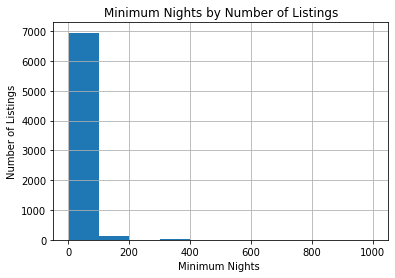

In [40]:
#How does the distribution of minimum nights look?

hist_mn = dataset["minimum_nights"].hist()
plt.xlabel("Minimum Nights ")
plt.ylabel("Number of Listings")
plt.title("Minimum Nights by Number of Listings")
plt.show()

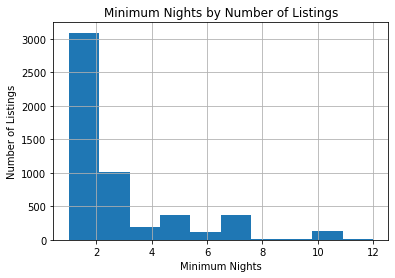

In [41]:
#Let's take a closer look at minimum nights
#Let's set a cap to minimum nights to 13 since most of the range seems to be within 1-13 nights

hist_mn1 = dataset["minimum_nights"][dataset["minimum_nights"]<13].hist()
plt.xlabel("Minimum Nights")
plt.ylabel("Number of Listings")
plt.title("Minimum Nights by Number of Listings")
plt.show()

In [42]:
#How many minimum nights are > 30?

dataset["minimum_nights"][dataset["minimum_nights"]>30]

0       180
1        90
7        90
8        90
9        90
       ... 
7814     90
7843     90
7888     90
7892     90
7906     90
Name: minimum_nights, Length: 800, dtype: int64

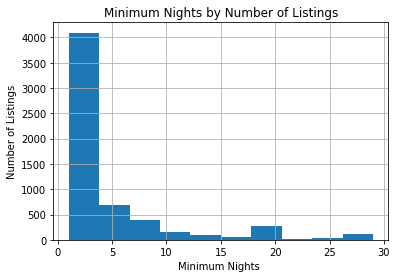

In [43]:
#Let's remove the outliers and replace minimum nights greater than 30 with 30

dataset.loc[(dataset.minimum_nights >30),"minimum_nights"]=30
hist_mn2=dataset["minimum_nights"][dataset["minimum_nights"]<30].hist()
plt.xlabel("Minimum Nights ")
plt.ylabel("Number of Listings")
plt.title("Minimum Nights by Number of Listings")
plt.show()


In [44]:
ng_mn = dataset.groupby("neighbourhood_group")["minimum_nights"].describe()
ng_mn

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Central Region,5609.0,8.724550,10.635105,1.0,2.0,3.0,14.00,30.0
East Region,485.0,8.144330,11.275650,1.0,1.0,2.0,7.00,30.0
North Region,192.0,8.760417,11.416205,1.0,1.0,2.0,7.00,30.0
North-East Region,332.0,9.623494,12.009052,1.0,1.0,2.0,20.25,30.0
West Region,497.0,9.094567,11.316965,1.0,1.0,3.0,10.00,30.0


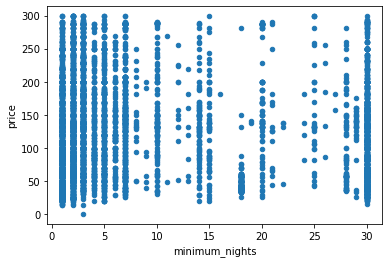

In [45]:
#Is there any relationship with minimum nights and price?

dataset[dataset["minimum_nights"]<=30].plot.scatter(x="minimum_nights", y="price")

In [46]:
dataset["minimum_nights"].corr(dataset["price"])

-0.051505779636662447

Price is not affected much by minimum nights.  
We see that across all rgions, the average minimum nights is between 8-10.  
In fact, there is a slight negative correlation between these two variables (-0.05).     
The miniscule correlation could be a result of small discounts given out to guests who stay at a hosts' property for a longer duration. The effect nonetheless is not that significant. It seems that regardless of how many nights a guest wants to stay at a property, price would remain relatively constant with some exceptions.


#### Availability 365

Lastly, let's take a look into availability of a property listing.   
What is the average and range of availability by property?   
If the purpose of Airbnb hosts' was to maximize their revenue, it would be imagined that availability would be year-long with some exception of holidays or personal events.

In [47]:
#Let's look at availability_365 and see if there's any relationship with other variables

dataset["availability_365"].describe()

count    7115.000000
mean      204.450457
std       147.091996
min         0.000000
25%        49.000000
50%       254.000000
75%       354.000000
max       365.000000
Name: availability_365, dtype: float64

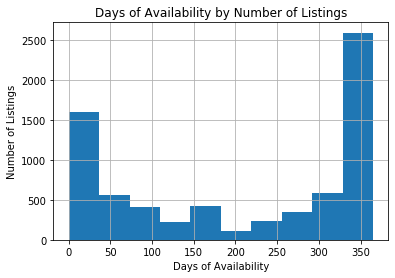

In [48]:
hist_availability = dataset["availability_365"].hist()
plt.xlabel ("Days of Availability")
plt.ylabel ("Number of Listings")
plt.title ("Days of Availability by Number of Listings")
plt.show()

In [49]:
ng_a = dataset.groupby("neighbourhood_group")["availability_365"].describe()
ng_a

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Central Region,5609.0,211.302371,144.890779,0.0,57.0,262.0,354.0,365.0
East Region,485.0,174.451546,150.945246,0.0,0.0,149.0,345.0,365.0
North Region,192.0,211.791667,154.014103,0.0,35.0,271.5,364.0,365.0
North-East Region,332.0,163.545181,147.289061,0.0,0.0,143.5,339.5,365.0
West Region,497.0,180.885312,154.942721,0.0,0.0,179.0,355.0,365.0


In [50]:
rt_a = dataset.groupby("room_type")["availability_365"].describe()
rt_a

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,3470.0,203.613545,141.785510,0.0,55.0,254.0,340.0,365.0
Private room,3264.0,197.107843,151.951589,0.0,11.0,213.0,356.0,365.0
Shared room,381.0,274.976378,133.449525,0.0,179.0,354.0,362.0,365.0


We can see more in depth the statistics of neighbourhood group and room type by availability.   

Central Region has almost the highest availability in a year.    
It's interesting to note that although the North Region has the lowest listings, it has the highest
availability in a year.    

It's not surprising to see that shared rooms has the highest availability.  
Shared rooms are an easy way to generate revenue, as a host can fit multiple guests into one room.  
If a host has multiple rooms in her property, by increasing the availability and lowering the price it could
become lucrative.  

Ultimately, availability depends on the preference of the host, whether or not they want to list a property or not.
External factors such as traveling, renovation, needing a break, etc could influence the availability.



Text(0.5, 1, 'Neighbourhood Group & Availability')

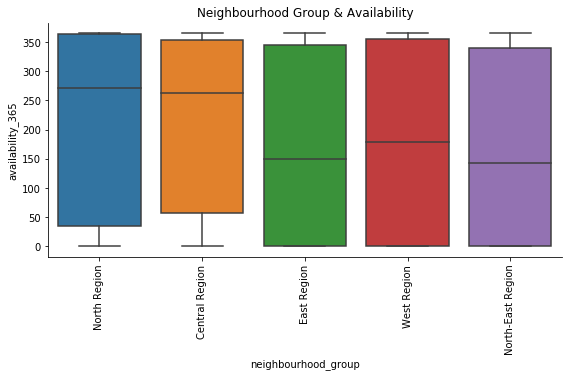

In [51]:
chart = sns.catplot(
        data=dataset,
        x = "neighbourhood_group",
        y = "availability_365",
        kind = "box",
        aspect = 2,
        height = 4)
plt.xticks(rotation = 90)
plt.title("Neighbourhood Group & Availability")


We can see that most of the overall range is between 49-354 days with an average availability of 204 days.   

If we look into each neighbourhood groups specifically, we can see differences:     
The Central Region has an average of 211 available days in a year for rental, with most of the range being in 57-354 days.     
The East Region has an average of 174 available days in a year for rental, with most of the range being in 0-354 days.    
The North Region has an average of 212 available days in a year for rental, with most of the range being in 35-364 days.    
The North-East Region has an average of 164 available days in a year for rental, with most of the range being in 0-340 days.    
The West Region has an average of 180 available days in a year for rental, with most of the range being in 0-355 days.

This is definitely important for future hosts to know! 

#### Correlation Matrix

Let's create a final correlation matrix, dropping variables that I do not think will be necessary for potential hosts to know such as name, host id, last review, latitude and longitude.

In [52]:
dataset.drop(["name", "host_id", "last_review","latitude","longitude"], axis=1, inplace=True)

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_length'],
      dtype='object')

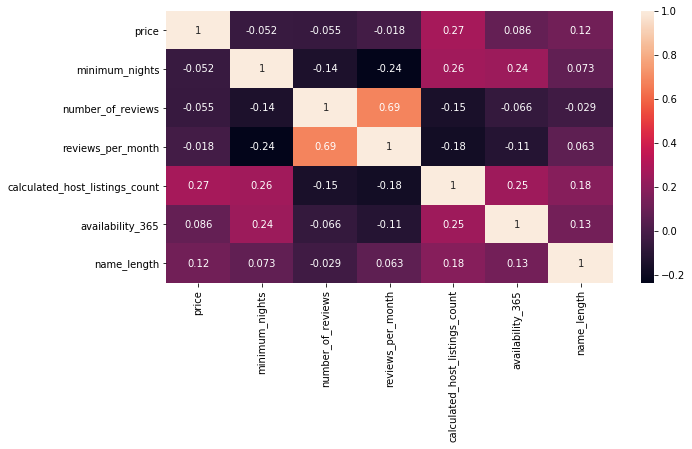

In [53]:
#Let's look at the correlation between all variables

corr = dataset.corr(method = 'pearson')
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True)
dataset.columns

In [54]:
#Now that some variables are dropped, let's look at the datatype one last time
dataset.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
name_length                         int64
dtype: object

## Creating Models


### Basic Linear Regression 

A linear regression fits a linear model with coefficients to minimize the residual sum of squares between the observed target in the dataset and the targets predicted by the linear approximation. It is used to determine the extent of a linear relationship between the dependent variable and independent variables. 

In our particular study, let's set our dependent variable to be price and the other remaining variables as the independent variables. Out of all the variables above, I believe price is perhaps the most relevant factor a future host would consider as that has direct ties with its ROI. Deciding what the price be by neighbourhood, room type, and etc.


In [55]:
#Let's start by creating dummies for neighbourhood_group and room_type.
#Dataframe shape will be checked as well

dataset_LM = pd.get_dummies(dataset, columns=["neighbourhood_group","room_type"], prefix = ["ng","rt"],drop_first=True)
dataset_LM.drop(["neighbourhood"], axis=1, inplace=True)
dataset_LM.shape

(7115, 13)

### Splitting into training and testing

In [56]:
#Let's split our training and testing data

X1 = dataset_LM.loc[:, dataset_LM.columns != 'price']
y1 = dataset_LM["price"]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5692, 12) (5692,)
(1423, 12) (1423,)


In [57]:
#Let's fit the model on the training data

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [58]:
#Let's find the R squared value

model.score(X_train, y_train)

0.49188512188421074

In [59]:
#Let's start our model prediction now

y_pred = model.predict(X_test)
Coeff = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff["Variable"]= X_train.columns
Coeff["Coefficient"]=model.coef_
Coeff.sort_values("Coefficient")


,Variable,Coefficient
11,rt_Shared room,-136.135393
10,rt_Private room,-86.872529
8,ng_North-East Region,-14.753028
7,ng_North Region,-14.539387
9,ng_West Region,-11.312377
6,ng_East Region,-2.136350
0,minimum_nights,-1.036268
2,reviews_per_month,-0.881112
1,number_of_reviews,-0.114774
3,calculated_host_listings_count,0.009563


In [60]:
#How does our coefficient parameters look?

model.coef_

array([-1.03626775e+00, -1.14774412e-01, -8.81111578e-01,  9.56264068e-03,
        5.98135601e-02,  2.21003507e-01, -2.13634984e+00, -1.45393871e+01,
       -1.47530276e+01, -1.13123770e+01, -8.68725286e+01, -1.36135393e+02])

In [61]:
#Let's calculate the RMSE

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

49.900203435010056

In [62]:
#Let's look closer at the OLS Regression estimates

x2 = sm.add_constant(X_train)
est = sm.OLS(y_train, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     458.1
Date:                Tue, 26 May 2020   Prob (F-statistic):               0.00
Time:                        14:40:22   Log-Likelihood:                -30371.
No. Observations:                5692   AIC:                         6.077e+04
Df Residuals:                    5679   BIC:                         6.085e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [63]:
#Calculated_host_listings_count is not significant in our situation and will be dropped

X_train.drop(["calculated_host_listings_count"], axis=1,inplace=True)
x2 = sm.add_constant(X_train)
est = sm.OLS(y_train, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     499.8
Date:                Tue, 26 May 2020   Prob (F-statistic):               0.00
Time:                        14:40:22   Log-Likelihood:                -30371.
No. Observations:                5692   AIC:                         6.077e+04
Df Residuals:                    5680   BIC:                         6.085e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  162.0327 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Linear Model Insights

Since a multiple linear regression was conducted, Adjusted R-Squared should be examined first.
An Adjusted R-Squared value of 49.1% tells us that the independent variables explain 49.1% of variations
of the dependent variable, being price.



The constant has a value of 161.79, meaning if all other x variables were set at 0, an entire apartment/
home in the Central Region would have a predicted price of 161.79. 

 
The coefficient of the East Region is -2.13.   
This can be interpreted as followed: If everything else is held constant, an entire home/apartment listing 
in the East Region will have a predicted price of 2.13 less than that of a similiar listing in the Central Region.
Similarily, the North Region would have a predicted cost of 14.54 less, North-East Region would have a predicted 
cost of 14.75 less and the West Region would have a predicted cost of 11.31 less than that of a similiar listing
in the Central Region.


We can also make same basis for type of rooms by its coefficient.
A private room in the Central Region would have a predicted price of 86.87 less than that of an entire 
home/apartment in the Central Region.   
A shared room in the Central Region would have a predicted price of 136.14 less than a entire home/apartment
in the Central Region.  


The coefficient of minimum nights can similarily tell us that with every additional unit increase in minimum
number of nights stayed, the predicted price would decrease by 1.04.



Standard error is the standard deviation of its sampling distribution.   
T statistic is the calculated difference represented in units of standard error.    
It is used in replace of a Z statistic because the population standard deviation is not known.   
 

The p-value determines the significance of the results in relation to the null.   
A p-value less than .05 is statistically significant, which indicates strong evidence against the null
as there is less than 5% probability of the null being correct.    
If we consider our alpha to be .05, we can reject the null for all variables except reviews_per_month
and the east region.
 

The confidence interval show the lower bound and upper bound for the true population coefficents with 95%
   confidence. The confidence interval tells us the precise and stable the measurements are.


RMSE is the standard deviation of the residuals, which measures how spread out the residual is and how 
   concentrated the data is around the line of best fit. The RMSE value of 49.9 shows that the model
   can relatively predict the data accurately. 
 
 
   



###  Lasso Regression 

A lasso regression uses shrinkage and performs both variable selection and regularization in order
to enhance the prediction accuracy and of the statistical model it produces. 
In other words, it nullifies parameters that do not improve the model.
In addition, since our dataset is not large, a Lasso regression might be more efficient than
a Linear Regression for predictions as it reduces the variance.

Let's use the variable neighborhood, which has more than 40 distinct values
More values result in more variables being tested when dummies are created.

In [64]:
dataset_LR = pd.get_dummies(dataset, columns=["neighbourhood_group", "neighbourhood", "room_type"],
                            prefix = ["ng", "nh", "rt"], drop_first= True)
dataset_LR.shape

(7115, 53)

In [65]:
XL = dataset_LR.loc[:, dataset_LR.columns != "price"]
yL = dataset_LR["price"]
X_trainL, X_testL, y_trainL, y_testL = train_test_split(XL, yL, test_size = .20, random_state=42)
print(X_trainL.shape, y_trainL.shape)
print(X_testL.shape, y_testL.shape)

(5692, 52) (5692,)
(1423, 52) (1423,)


In [66]:
regL = Lasso(alpha = 0.01)
regL.fit(X_trainL, y_trainL)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
#Like our Linear Regression Model, let's check our R Squared Value

regL.score(X_trainL, y_trainL)


0.5125815555518364

In [68]:
#How does our RMSE look with a Lasso Regression?

y_predL = regL.predict(X_testL)
print(np.sqrt(metrics.mean_squared_error(y_testL, y_predL)))

49.208076573536474


In [69]:
#What about the coefficients?

CoeffL = pd.DataFrame(columns=["Variable","Coefficient"])
CoeffL["Variable"]= X_trainL.columns
CoeffL["Coefficient"]=regL.coef_
CoeffL.sort_values("Coefficient", ascending = False)

,Variable,Coefficient
42,nh_Southern Islands,86.946087
43,nh_Sungei Kadut,29.931844
31,nh_Orchard,24.306855
19,nh_Downtown Core,20.937589
18,nh_Clementi,20.093706
45,nh_Tanglin,9.503438
16,nh_Central Water Catchment,9.031650
41,nh_Singapore River,6.637440
22,nh_Jurong East,6.538275
37,nh_Rochor,6.347765


In [70]:
#How does the coefficients parameter look?
regL.coef_

array([-1.11297333e+00, -1.06914636e-01, -1.43202997e+00, -1.49288987e-03,
        6.13973632e-02,  2.28320894e-01, -1.81790475e+00, -1.29809648e+01,
       -5.38820297e+00, -1.54824509e+01,  2.86461212e-01, -2.27997432e+00,
        0.00000000e+00, -2.08358400e+01, -6.03828922e+00, -0.00000000e+00,
        9.03164977e+00, -6.66304696e+00,  2.00937056e+01,  2.09375890e+01,
       -1.02911285e+01, -1.66153038e+01,  6.53827523e+00, -2.51200890e+00,
       -5.79413827e+00,  0.00000000e+00, -6.07194759e+00, -0.00000000e+00,
        9.67613000e-01,  3.85781234e+00,  4.99478215e+00,  2.43068550e+01,
        5.60257300e-01, -8.68251301e+00, -1.51694991e+01,  2.26629301e+00,
       -8.03490888e+00,  6.34776464e+00, -8.67241525e+00, -1.94774206e+01,
       -2.43295540e+00,  6.63744029e+00,  8.69460874e+01,  2.99318443e+01,
       -8.37242182e+00,  9.50343764e+00, -8.66821084e+00, -2.01307346e+01,
       -1.08723897e+01, -0.00000000e+00, -8.68770899e+01, -1.38915667e+02])

### Lasso Regression Insights

1. The lasso regression had a better R Squared Value (.513) and did better in prediction than 
   our normal linear regression R Squared Value (.492).


2. Our RMSE has a slightly smaller value (49.2).


3. We can see that compared to our earlier coefficients paramaters, some of the paramaters
   have zero coefficients.


4. Coefficients have a higher range between [-138.9, 86.9] which is higher than before.


## Recap

The purpose of this study was based on a hypothetic scenario in which future Airbnb Singapore hosts wants to evaluate what criteras are important in their decision making with Airbnb. By understanding the effects of each variable, a future host can make a strategic decision based on the findings.

(e.g: What is the most optimal region to list a property?         
      How does price distribution beftween different neighbourhood groups/regions look like?       
      What is the effect with minimum nights or availability if there is any?...).         

To summarize our findings, it was found that:   
The initial dataset had roughly 8k entries with 16 variables.     
An initial correlation matrix was conducted to examine the relationship between different variables.   
After cleaning up the data (changing nulls, setting several caps, removing unnecessary variables) and removing  variables that was thought to be unnecessary, the end dataset resulted in 7.1k entries and 7 variables.
A final correlation matrix with the remaining variables were conducted.   


#### Price
99% of the dataset had prices under 1000 with the remaining 1% having price over 1000.
It was found most prices were between the range of 0-300, by setting a price cap of 300 the overall average price per night for a rental came out to be 122.
In addition, most listings with a price over 100 were entire homes/apartments in the Central Region while most listings under a price of 100 were mainly private rooms in the other four regions. 


#### Neighbourhood Groups/Regions
In Singapore, there are five neighbourhood groups/regions: Central, East, North, North-East and West.  
Something important to note is the distribution and pricing of listings between the different regions.
This can definitely contribute to a future's host strategic decision in where to list a property.

The distribution of the listings found are as followed:   
1. 78% of the listings are located in the Central Region    
2. 7% of listings are located in the West Region    
3. 7% of listings are located in the East Region    
4. 5% of listings are located in the North-East Region   
5. 3% of listings are located in the North Region        

The average listing price by neigbhourhood are as followed:    
1. Central Region - 130.405, most listings within the price range of 69-179   
2. East Region - 102.342, most listings within the price range of 59-131   
3. North Region - 88.510, most listings within the price range of 43.5-125   
4. North-East Region - 78.389, most listings within the price range of 44-99   
5. West Region - 89.463, most listings within the price range of 50-121   

#### Neighbourhoods
From the five regions, it was found that there were 41 unique neighborhoods in Singapore  
1. Central Region - 19 neighbourhoods   
2. North Region - 7 neighbourhoods   
3. West Region - 7 neighbourhoods   
4. Northeast Region - 5 neighbourhoods   
5. East Region - 3 neigbhourhoods  
 
Kallang (952) had the highest amount of listings, while Lim Chu Kang (1) only had one listing.   
In fact, there were five neighbourhoods with <= 5 listings,        
23 neighbourhoods with < 100 listings,         
8 neighbourhoods with listings between 100-200,          
4 neighbourhoods with listings between 200-400,         
4 neighbourhoods with listings between 400-500,         
2 neighbourhoods with listings between 900-1000    
This translated to 70% of the listings being counted more than 200 times and the remaining 30% counted <200 times.


#### Host Ids
Host Ids was found to not be a really useful variable and was later dropped.   
Although it was found that the host id 66406177 (Jay) had the most listings of property in Airbnb Singapore.    
A future host could potentially contact Jay for discussion about his experience with Airbnb.   

#### Name Length
The shortest name of a listing had 1 character and the longest name of a listing had 92 characters.    
It was found that there was a miniscule negative correlation between name length and reviews (-0.029).    
However, it was found that there is a slight positive correlation name length and price (.125).    


#### Room Type
49% of listings are entire homes/apartments, average price of 169.9   
46% of listings are private rooms, average price of 80.1    
5% of listings are shared rooms, average price of 45.5    


#### Minimum Nights
It was found that there was a range between 1-1000 minimum nights which was odd, since most listings was within the range between 1-13. Only one listing had a minimum night requirement of 1000. Removing the outliers and replacing minimum nights over 30 with 30, it was found that was a small negative correlation between minimum nights and price (-0.052).

#### Availability 365
Most listings were available 49-354 days out of a year.   
Central Region had an average availability of 211.3 days   
East Region had an average availability of 174.5 days    
North Region had an average availability of 211.8 days        
North-East Region had an average availability of 163.5 days    
West Region had an average availability of 180.9 days.    

#### Models
Linear Regression    
The Linear Regression had a 49.1% accurate prediction of price. The constant value of 161.79 means that if all other variables were set a 0, an entire apartment/home in the Central Region would have a predicted price of 161.79.    
Similarily, this basis can be used for the following coefficients:   
Private Room - 86.87 less  
Shared room 136.14 less   
Minimum nights - 1.04 less  
P-value also tells us that we can reject the null for all variables except the east region and reviews per month.

Lasso Regression     
The Lasso Regression was a better predictor of neighbourhood than the Linear Regression, with a R squared value of .513 and RMSE value of 49.2. Compared to the Linear Regression, some parameters consisted of zero coefficients, with the coefficients having a higher range than the Linear Regression.


